In [1]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


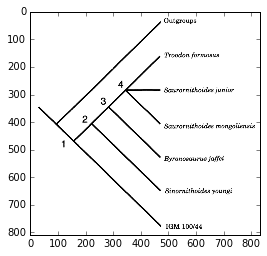

In [2]:
img = cv2.imread('images/Tree1.png')

plt.imshow(img)

In [3]:
canny = cv2.Canny(img, threshold1=150, threshold2=100)


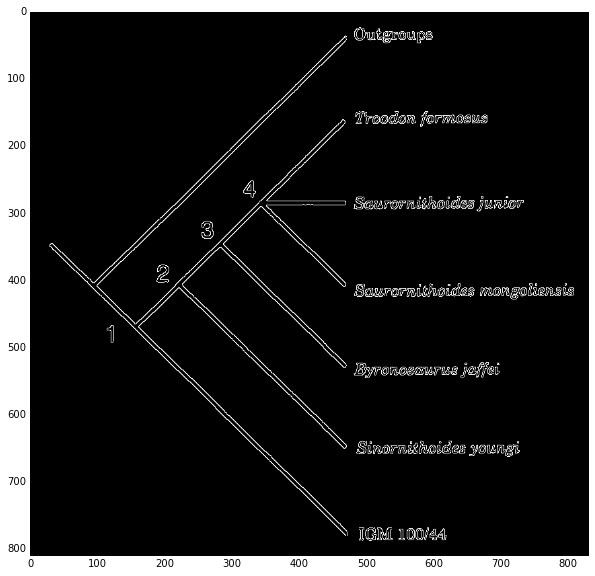

In [4]:
def show(img, cvt=cv2.COLOR_GRAY2RGB, do_cvt=True):
    plt.figure(figsize=(10,10))
    if do_cvt: plt.imshow(cv2.cvtColor(img, cvt))
    else: plt.imshow(img)
    
show(canny)

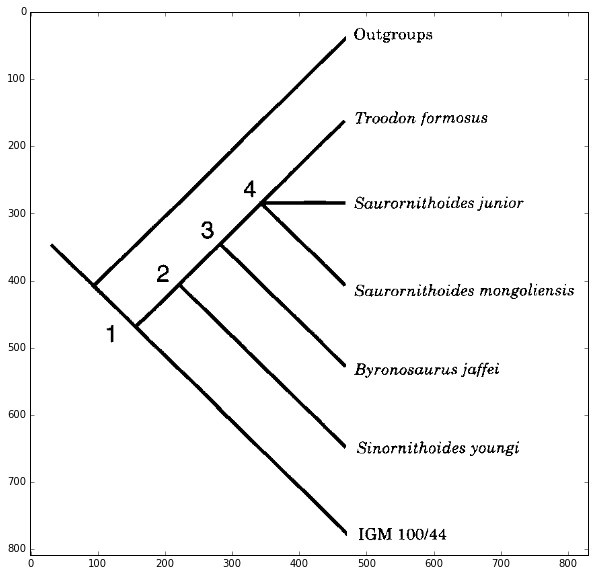

In [5]:
ret, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

show(thresh)

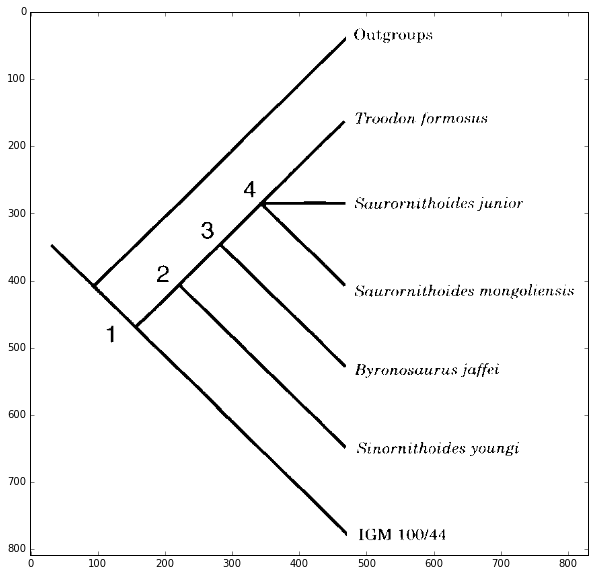

In [6]:
dilated = cv2.dilate(thresh, (20, 20))
show(dilated)

In [7]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

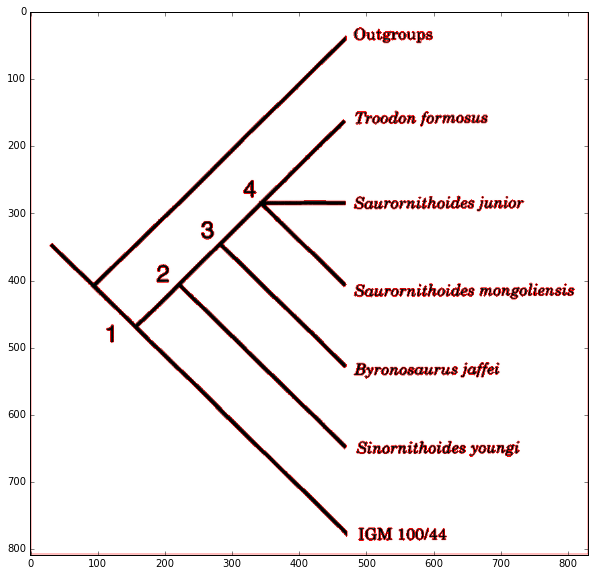

In [8]:
contour_img = np.copy(img)
cv2.drawContours(contour_img, contours, -1, (255,0,0))
show(contour_img, do_cvt=False)

In [9]:


for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    cv2.rectangle(contour_img, (x, y), (x+w, y+h), (255,0,255), 1, 8, 0 );
print bounding_rects

show(contour_img, do_cvt=False)

NameError: name 'bounding_rects' is not defined

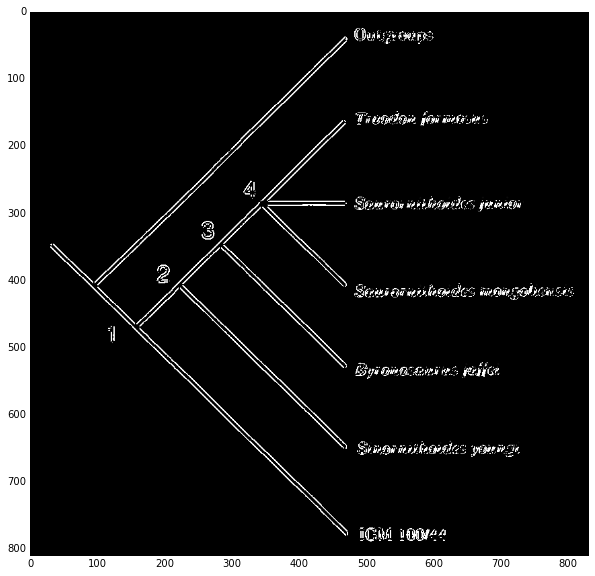

In [10]:
corners = cv2.cornerHarris(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 2, 3, 0.04)
show(corners)

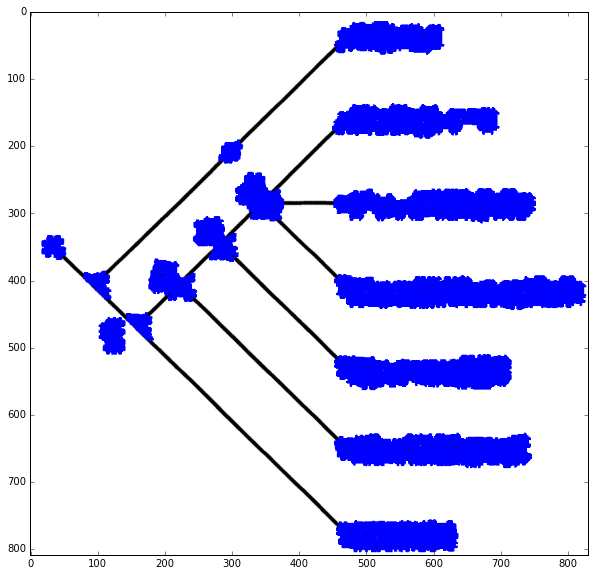

In [20]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 4, 3, 0.05)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.05*dst.max()] = [0,0,255]

show(img, False)

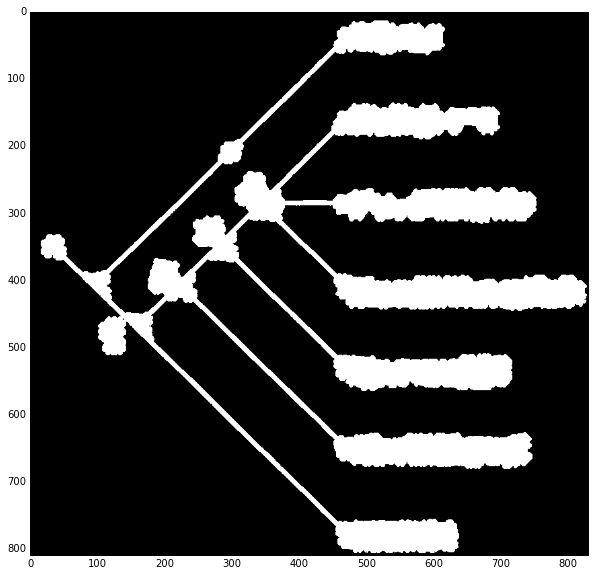

In [35]:
def text_contours(img, thresh=0.5, kernel=1, iterations=1):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV) # threshold
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    dilated = cv2.dilate(thresh,kernel,iterations) # dilate
#     im2, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) # get contours
    
#     for contour in contours:
#         [x,y,w,h] = cv2.boundingRect(contour)
#         if h < 5 or w < 5: continue
#         #if h > grays[i].shape[0] * 0.5 or w > grays[i].shape[1] * 0.5: continue
#         cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,255), 2)
        
    return dilated
    
show(text_contours(img))
contours = text_contours(img)

In [39]:
len(cv2.findContours(contours,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE))

2